In [1]:
IMAGES_DIR = '/d2/caches/kaggle-planet/processed-images'
IMAGE_SHAPE = (64, 64, 4)

In [2]:
%run 'Lib.ipynb'

In [3]:
import keras
from keras.layers import *
from keras.applications import *
from keras.models import *

Using TensorFlow backend.


In [4]:
X_files = np.load('out/X_files.npy')
Y_tags_misc = np.load('out/Y_tags_misc.npy')
Y_tags_weather = np.load('out/Y_tags_weather.npy')

In [34]:
image_input = Input(shape=IMAGE_SHAPE, name='image_input')

In [47]:
x = Conv2D(32, (3, 3), padding='same')(image_input)
x = Conv2D(32, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = MaxPool2D(pool_size=2)(x)

x = Flatten()(x)
features = Dropout(rate=0.5)(x)

In [48]:
out_tags_misc = Dense(Y_tags_misc.shape[1], activation='sigmoid', name='tags_misc')(features)
out_tags_weather = Dense(Y_tags_weather.shape[1], activation='softmax', name='tags_weather')(features)

In [49]:
model = Model(inputs=[image_input], outputs=[out_tags_misc, out_tags_weather])

In [50]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image_input (InputLayer)         (None, 64, 64, 4)     0                                            
____________________________________________________________________________________________________
conv2d_61 (Conv2D)               (None, 64, 64, 32)    1184        image_input[0][0]                
____________________________________________________________________________________________________
conv2d_62 (Conv2D)               (None, 64, 64, 32)    9248        conv2d_61[0][0]                  
____________________________________________________________________________________________________
max_pooling2d_27 (MaxPooling2D)  (None, 32, 32, 32)    0           conv2d_62[0][0]                  
___________________________________________________________________________________________

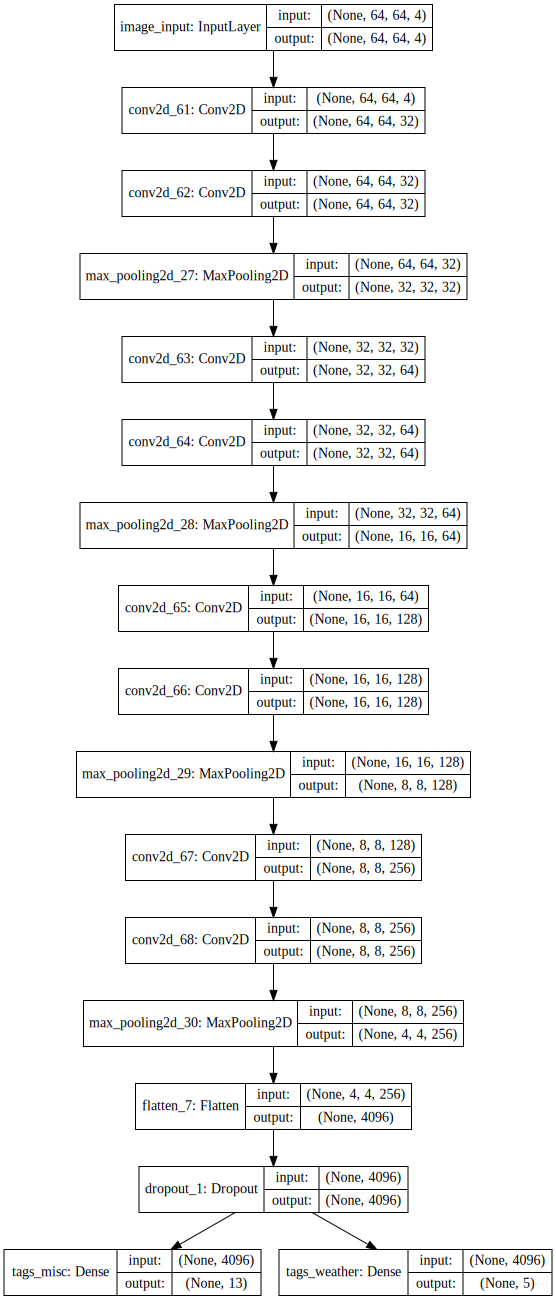

In [51]:
model_as_svg(model)

In [55]:
model.compile(
    optimizer='rmsprop',
    loss={
        'tags_misc': 'binary_crossentropy',
        'tags_weather': 'binary_crossentropy'
    },
    loss_weights={'tags_misc': 1.,
                  'tags_weather': 0.5})

In [56]:
model